In [21]:
import zipfile
import numpy as np

import glob
import re
import pandas as pd

# read the dataset using the compression zip
all_data = pd.read_csv('all_data_for_analysis.zip',compression='zip')

In [22]:
pd.set_option('display.max_rows', 100)

In [23]:
all_data['Count'] = 1

Drop nulls in comments

In [24]:
all_data['Comment'].isna().sum()

2

In [25]:
all_data = all_data.dropna(subset=['Comment'])

In [26]:
all_data

,PR_number,Comment,Author,Date,Commit_message,Descriptions,status,main_author,revision_number,url,PR_number_no_patch_number,comment_length,Flesch-Kincaid,Count
0,12050_rev2_d,I would prefer that you didn't submit thisI w...,Kenny Maynard,2012-01-04 22:01:33.920000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,318,77.27,1
1,12050_rev2_d,You also need to fix the commit message so it ...,Kenny Maynard,2012-01-04 22:02:19.848000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,77,80.62,1
2,12050_rev2_d,I would prefer that you didn't submit this-1 ...,Kenny Maynard,2012-01-05 22:42:21.672000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,76,66.74,1
3,12050_rev2_d,"I don't have a huge opinion on it, really. My...",Noah Dean,2012-01-06 03:50:33.697000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,388,70.33,1
4,12050_rev3_d,"I think Rags is working on this today too, so ...",Andreas Short,2012-01-08 21:36:57.811000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,3,http://review.couchbase.org/#/c/12050/3,12050,161,73.17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30096,80604_rev2_d,Got it - will remember that.,Ellie Kidd,2017-07-13 18:41:21.038000000,NaN,CBQE-3067: Use better FTS level compaction con...,1,Ellie Kidd,2,http://review.couchbase.org/#/c/80604/2,80604,28,83.32,1
30097,80992_rev1_d,MemoryQuota may set in param with default valu...,Frederick Booker,2017-07-18 15:43:30.472000000,NaN,CBQE-4209: Added the cbas installation and ser...,1,Alfred Park,1,http://review.couchbase.org/#/c/80992/1,80992,113,94.15,1
30098,82094_rev1_d,This change has already been reviewed by dev f...,Monique Barker,2017-08-09 02:25:02.503000000,NaN,Adding subquery tests to watson branch.,1,Dylan Paul,1,http://review.couchbase.org/#/c/82094/1,82094,95,72.32,1
30099,84162_rev1_d,test suite lww in entbackup restore is also re...,Frederick Booker,2017-10-09 19:52:13.747000000,NaN,CBQE-1898 lww tests are covered in py-entbacku...,1,Frederick Booker,1,http://review.couchbase.org/#/c/84162/1,84162,61,68.77,1


In [27]:
only_merged = all_data[all_data['status']==1]

In [28]:
only_abandoned = all_data[all_data['status']==0]

In [29]:
only_abandoned.count()

PR_number                    6427
Comment                      6427
Author                       6427
Date                         6427
Commit_message               4195
Descriptions                 6425
status                       6427
main_author                  6427
revision_number              6427
url                          6427
PR_number_no_patch_number    6427
comment_length               6427
Flesch-Kincaid               6427
Count                        6427
dtype: int64

In [30]:
only_merged.count()

PR_number                    23672
Comment                      23672
Author                       23672
Date                         23672
Commit_message               16977
Descriptions                 23672
status                       23672
main_author                  23672
revision_number              23672
url                          23672
PR_number_no_patch_number    23672
comment_length               23672
Flesch-Kincaid               23672
Count                        23672
dtype: int64

Join all comments from PRs that have been merged

In [31]:
all_comments = ''.join(only_abandoned['Comment'])

In [32]:
from rake_nltk import Rake
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GNR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
r = Rake()
r.extract_keywords_from_text(all_comments)

In [34]:
dict(sorted(r.get_word_degrees().items(), key=lambda item: item[1], reverse=True))

{'abandoned': 3748,
 'commit': 2266,
 'good': 1827,
 'looks': 1826,
 'branch': 1745,
 'change': 1652,
 '1': 1647,
 'would': 1605,
 'rebase': 1465,
 'script': 1324,
 'patchset': 1323,
 'patch': 1306,
 '->': 1305,
 'trivial': 1304,
 'detection': 1302,
 'comment': 1297,
 'inline': 1140,
 'submit': 1120,
 'someone': 1020,
 'villegas': 1019,
 'roselyn': 1014,
 'prefer': 1013,
 'else': 1009,
 'must': 1004,
 'new': 1003,
 'message': 928,
 'merge': 921,
 'abandonedwrong': 901,
 'id': 852,
 'previous': 810,
 'test': 796,
 'one': 776,
 'like': 735,
 'please': 674,
 'matches': 672,
 'abandonedduplicate': 654,
 'well': 621,
 'also': 612,
 'eclipse': 599,
 'review': 594,
 'need': 587,
 'java': 554,
 'code': 543,
 'restricted': 533,
 'think': 526,
 'use': 500,
 'line': 496,
 'set': 488,
 '...': 484,
 'approve': 478,
 'changes': 474,
 'still': 473,
 '2': 459,
 'gerrit': 450,
 'org': 448,
 'approved': 441,
 '0': 426,
 'jgit': 425,
 'see': 416,
 ').': 416,
 'tests': 403,
 'fix': 401,
 'get': 393,
 'add

# Sentiment Analysis

In [35]:
from textblob import TextBlob

In [36]:
all_data['Polarity'] = 0
all_data['Subjectivity'] = 0
for n in range(len(all_data)):
    all_data['Polarity'].iloc[n] = TextBlob(all_data['Comment'].iloc[n]).sentiment.polarity
    all_data['Subjectivity'].iloc[n] = TextBlob(all_data['Comment'].iloc[n]).sentiment.subjectivity

C:\Users\GNR\AppData\Local\Temp\ipykernel_5672\1903632213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Polarity'].iloc[n] = TextBlob(all_data['Comment'].iloc[n]).sentiment.polarity
C:\Users\GNR\AppData\Local\Temp\ipykernel_5672\1903632213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Subjectivity'].iloc[n] = TextBlob(all_data['Comment'].iloc[n]).sentiment.subjectivity


In [37]:
all_data

,PR_number,Comment,Author,Date,Commit_message,Descriptions,status,main_author,revision_number,url,PR_number_no_patch_number,comment_length,Flesch-Kincaid,Count,Polarity,Subjectivity
0,12050_rev2_d,I would prefer that you didn't submit thisI w...,Kenny Maynard,2012-01-04 22:01:33.920000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,318,77.27,1,0.000000,0.362500
1,12050_rev2_d,You also need to fix the commit message so it ...,Kenny Maynard,2012-01-04 22:02:19.848000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,77,80.62,1,0.000000,1.000000
2,12050_rev2_d,I would prefer that you didn't submit this-1 ...,Kenny Maynard,2012-01-05 22:42:21.672000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,76,66.74,1,0.000000,0.000000
3,12050_rev2_d,"I don't have a huge opinion on it, really. My...",Noah Dean,2012-01-06 03:50:33.697000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,388,70.33,1,0.068750,0.418750
4,12050_rev3_d,"I think Rags is working on this today too, so ...",Andreas Short,2012-01-08 21:36:57.811000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,3,http://review.couchbase.org/#/c/12050/3,12050,161,73.17,1,0.118182,0.677273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30096,80604_rev2_d,Got it - will remember that.,Ellie Kidd,2017-07-13 18:41:21.038000000,NaN,CBQE-3067: Use better FTS level compaction con...,1,Ellie Kidd,2,http://review.couchbase.org/#/c/80604/2,80604,28,83.32,1,0.000000,0.000000
30097,80992_rev1_d,MemoryQuota may set in param with default valu...,Frederick Booker,2017-07-18 15:43:30.472000000,NaN,CBQE-4209: Added the cbas installation and ser...,1,Alfred Park,1,http://review.couchbase.org/#/c/80992/1,80992,113,94.15,1,0.000000,0.000000
30098,82094_rev1_d,This change has already been reviewed by dev f...,Monique Barker,2017-08-09 02:25:02.503000000,NaN,Adding subquery tests to watson branch.,1,Dylan Paul,1,http://review.couchbase.org/#/c/82094/1,82094,95,72.32,1,0.000000,0.000000
30099,84162_rev1_d,test suite lww in entbackup restore is also re...,Frederick Booker,2017-10-09 19:52:13.747000000,NaN,CBQE-1898 lww tests are covered in py-entbacku...,1,Frederick Booker,1,http://review.couchbase.org/#/c/84162/1,84162,61,68.77,1,0.000000,0.000000


In [38]:
all_data['Flesch-Kincaid'].mean()

63.505089205621445

## Finding outliers

c:\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


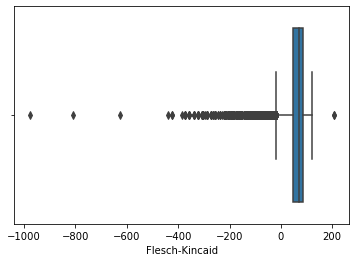

In [39]:
import seaborn as sns
sns.boxplot(all_data['Flesch-Kincaid'])

The algorithm is found here https://pythonsansar.com/how-to-remove-outliers-in-python-pandas-package/ 

In [40]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(all_data, "Flesch-Kincaid")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  151.155
Lower Whisker:  -18.005000000000003


Here we take a look at outliers.

In [41]:
all_data[(all_data['Flesch-Kincaid'] < lower) | (all_data['Flesch-Kincaid'] > upper)]

,PR_number,Comment,Author,Date,Commit_message,Descriptions,status,main_author,revision_number,url,PR_number_no_patch_number,comment_length,Flesch-Kincaid,Count,Polarity,Subjectivity
101,16338_rev1_d,"(1 inline comment)Line:86, src/main/java/com/...",Andreas Short,2012-06-01 23:50:18.929000000,NaN,Ensure config update checks do not overwhelm t...,1,Cory Peck,1,http://review.couchbase.org/#/c/16338/1,16338,115,-126.67,1,0.00,0.00
102,16338_rev1_d,"(1 inline comment)Line:86, src/main/java/com/...",Andreas Short,2012-07-20 07:02:32.145000000,NaN,Ensure config update checks do not overwhelm t...,1,Cory Peck,1,http://review.couchbase.org/#/c/16338/1,16338,102,-221.25,1,0.00,0.00
190,21197_rev1_d,AbandonedOops,Kenny Maynard,2012-09-28 17:38:17.769000000,The Authentication is initiated based on the n...,JCBC-70: Fix Authentication to non-default buc...,0,Emerson Nolan,1,http://review.couchbase.org/#/c/21197/1,21197,14,-47.99,1,0.00,0.00
237,25482_rev2_d,AbandonedTested,Yasmin Rush,2013-05-16 09:36:45.172000000,NaN,JCBC-274: Fix for NPE in observe tests when fu...,0,Ayla Reynolds,2,http://review.couchbase.org/#/c/25482/2,25482,16,-47.99,1,0.00,0.00
258,26725_rev2_d,AbandonedPushed another commit,Lawson French,2013-06-06 07:17:50.410000000,NaN,fix readme 314,0,Lawson French,2,http://review.couchbase.org/#/c/26725/2,26725,31,-24.64,1,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29269,34682_rev4_d,"Result of 20% DGM runtest_view_ops,ddoc_ops=cr...",Moises Brennan,2014-03-25 07:35:00.544000000,NaN,CBQE-2085 add tests for views - heavy dgm,1,Justus Ortiz,4,http://review.couchbase.org/#/c/34682/4,34682,204,-197.90,1,0.00,0.00
29401,36939_rev5_d,+ incomprehensible commit message,Esperanza Cherry,2014-05-14 10:07:44.443000000,commented out code in progress. used camel cas...,removed new codecommented out code in progress...,0,Linda Vaughansingh,5,http://review.couchbase.org/#/c/36939/5,36939,34,-75.40,1,0.00,0.00
29785,44970_rev4_d,[tuq_client]goroot:/tmp/tuq_git/gogopath:/tmp/...,Trevor Santana,2015-01-06 17:56:39.169000000,add sherlock_path variable to tuq_client sections,CBQE-2541: get available path for sherlock MAC...,1,Trevor SantanaMironava,4,http://review.couchbase.org/#/c/44970/4,44970,82,-809.39,1,0.00,0.00
29794,44995_rev8_d,There was a bug when passing services_init. Fi...,Quentin Ali,2015-01-07 01:57:10.642000000,- We can provision 1 node cluster with data se...,CBQE-2542 :: Add support for configuring singl...,1,Quentin Ali,8,http://review.couchbase.org/#/c/44995/8,44995,376,-102.81,1,0.05,0.15


Removing outliers and create new dataframe.

In [50]:
all_data_no_read_outliers = all_data[(all_data['Flesch-Kincaid'] > lower) & (all_data['Flesch-Kincaid'] < upper)]

In [51]:
all_data_no_read_outliers

,PR_number,Comment,Author,Date,Commit_message,Descriptions,status,main_author,revision_number,url,PR_number_no_patch_number,comment_length,Flesch-Kincaid,Count,Polarity,Subjectivity
0,12050_rev2_d,I would prefer that you didn't submit thisI w...,Kenny Maynard,2012-01-04 22:01:33.920000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,318,77.27,1,0.000000,0.362500
1,12050_rev2_d,You also need to fix the commit message so it ...,Kenny Maynard,2012-01-04 22:02:19.848000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,77,80.62,1,0.000000,1.000000
2,12050_rev2_d,I would prefer that you didn't submit this-1 ...,Kenny Maynard,2012-01-05 22:42:21.672000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,76,66.74,1,0.000000,0.000000
3,12050_rev2_d,"I don't have a huge opinion on it, really. My...",Noah Dean,2012-01-06 03:50:33.697000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,388,70.33,1,0.068750,0.418750
4,12050_rev3_d,"I think Rags is working on this today too, so ...",Andreas Short,2012-01-08 21:36:57.811000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,3,http://review.couchbase.org/#/c/12050/3,12050,161,73.17,1,0.118182,0.677273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30096,80604_rev2_d,Got it - will remember that.,Ellie Kidd,2017-07-13 18:41:21.038000000,NaN,CBQE-3067: Use better FTS level compaction con...,1,Ellie Kidd,2,http://review.couchbase.org/#/c/80604/2,80604,28,83.32,1,0.000000,0.000000
30097,80992_rev1_d,MemoryQuota may set in param with default valu...,Frederick Booker,2017-07-18 15:43:30.472000000,NaN,CBQE-4209: Added the cbas installation and ser...,1,Alfred Park,1,http://review.couchbase.org/#/c/80992/1,80992,113,94.15,1,0.000000,0.000000
30098,82094_rev1_d,This change has already been reviewed by dev f...,Monique Barker,2017-08-09 02:25:02.503000000,NaN,Adding subquery tests to watson branch.,1,Dylan Paul,1,http://review.couchbase.org/#/c/82094/1,82094,95,72.32,1,0.000000,0.000000
30099,84162_rev1_d,test suite lww in entbackup restore is also re...,Frederick Booker,2017-10-09 19:52:13.747000000,NaN,CBQE-1898 lww tests are covered in py-entbacku...,1,Frederick Booker,1,http://review.couchbase.org/#/c/84162/1,84162,61,68.77,1,0.000000,0.000000


In [52]:
all_data_no_read_outliers['Flesch-Kincaid'].mean()

C:\Users\GNR\AppData\Local\Temp\ipykernel_5672\1479627717.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_data_no_read_outliers.mean()


status               0.788822
revision_number      3.319248
comment_length     102.661817
Flesch-Kincaid      67.457173
Count                1.000000
Polarity             0.253973
Subjectivity         0.378282
dtype: float64

c:\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


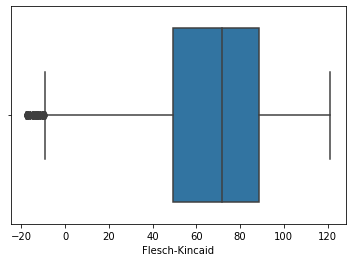

In [49]:
sns.boxplot(all_data_no_read_outliers['Flesch-Kincaid'])

Checking for outliers in Sentiment analysis.

c:\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


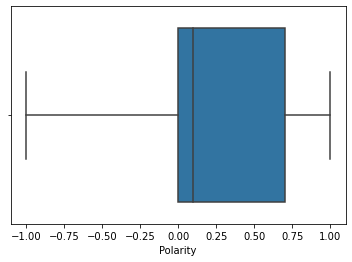

In [55]:
sns.boxplot(all_data_no_read_outliers['Polarity'])

c:\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


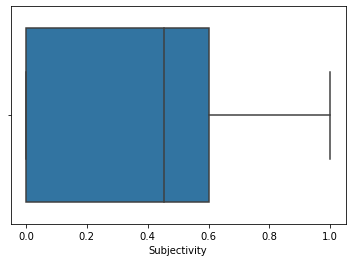

In [56]:
sns.boxplot(all_data_no_read_outliers['Subjectivity'])

In [54]:
upper, lower = outliers(all_data_no_read_outliers, "Polarity")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  1.7499999999999998
Lower Whisker:  -1.0499999999999998


In [57]:
all_data_no_read_outliers = all_data_no_read_outliers[(all_data_no_read_outliers['Polarity'] > lower) & (all_data_no_read_outliers['Polarity'] < upper)]

In [60]:
upper, lower = outliers(all_data_no_read_outliers, "Subjectivity")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  1.5000000000000002
Lower Whisker:  -0.9000000000000001


In [61]:
all_data_no_read_outliers = all_data_no_read_outliers[(all_data_no_read_outliers['Subjectivity'] > lower) & (all_data_no_read_outliers['Subjectivity'] < upper)]

In [62]:
all_data_no_read_outliers

,PR_number,Comment,Author,Date,Commit_message,Descriptions,status,main_author,revision_number,url,PR_number_no_patch_number,comment_length,Flesch-Kincaid,Count,Polarity,Subjectivity
0,12050_rev2_d,I would prefer that you didn't submit thisI w...,Kenny Maynard,2012-01-04 22:01:33.920000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,318,77.27,1,0.000000,0.362500
1,12050_rev2_d,You also need to fix the commit message so it ...,Kenny Maynard,2012-01-04 22:02:19.848000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,77,80.62,1,0.000000,1.000000
2,12050_rev2_d,I would prefer that you didn't submit this-1 ...,Kenny Maynard,2012-01-05 22:42:21.672000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,76,66.74,1,0.000000,0.000000
3,12050_rev2_d,"I don't have a huge opinion on it, really. My...",Noah Dean,2012-01-06 03:50:33.697000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,2,http://review.couchbase.org/#/c/12050/2,12050,388,70.33,1,0.068750,0.418750
4,12050_rev3_d,"I think Rags is working on this today too, so ...",Andreas Short,2012-01-08 21:36:57.811000000,Refactoring changes summary:Membase has been r...,Potential Refactoring of Java Client to couchb...,1,Emerson Nolan,3,http://review.couchbase.org/#/c/12050/3,12050,161,73.17,1,0.118182,0.677273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30096,80604_rev2_d,Got it - will remember that.,Ellie Kidd,2017-07-13 18:41:21.038000000,NaN,CBQE-3067: Use better FTS level compaction con...,1,Ellie Kidd,2,http://review.couchbase.org/#/c/80604/2,80604,28,83.32,1,0.000000,0.000000
30097,80992_rev1_d,MemoryQuota may set in param with default valu...,Frederick Booker,2017-07-18 15:43:30.472000000,NaN,CBQE-4209: Added the cbas installation and ser...,1,Alfred Park,1,http://review.couchbase.org/#/c/80992/1,80992,113,94.15,1,0.000000,0.000000
30098,82094_rev1_d,This change has already been reviewed by dev f...,Monique Barker,2017-08-09 02:25:02.503000000,NaN,Adding subquery tests to watson branch.,1,Dylan Paul,1,http://review.couchbase.org/#/c/82094/1,82094,95,72.32,1,0.000000,0.000000
30099,84162_rev1_d,test suite lww in entbackup restore is also re...,Frederick Booker,2017-10-09 19:52:13.747000000,NaN,CBQE-1898 lww tests are covered in py-entbacku...,1,Frederick Booker,1,http://review.couchbase.org/#/c/84162/1,84162,61,68.77,1,0.000000,0.000000


Only merged comments

In [63]:
only_merged_no_outliers = all_data_no_read_outliers[all_data['status']==1]

C:\Users\GNR\AppData\Local\Temp\ipykernel_5672\289382341.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  only_merged_no_outliers = all_data_no_read_outliers[all_data['status']==1]


In [74]:
only_merged_no_outliers['Polarity'].mean()

0.29802291536665926

In [75]:
only_merged_no_outliers['Subjectivity'].mean()

0.40838149245626254

Only unmerged comments

In [64]:
only_abandoned_no_outliers = all_data_no_read_outliers[all_data['status']==0]

C:\Users\GNR\AppData\Local\Temp\ipykernel_5672\800455061.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  only_abandoned_no_outliers = all_data_no_read_outliers[all_data['status']==0]


In [76]:
only_abandoned_no_outliers['Polarity'].mean()

0.0894332379533173

In [77]:
only_abandoned_no_outliers['Subjectivity'].mean()

0.2658520314688019

## Means

In [44]:
metrics_per_pull_request = all_data.groupby(['PR_number_no_patch_number']).sum()
metrics_per_pull_request_merged = only_merged.groupby(['PR_number_no_patch_number']).sum()
metrics_per_pull_request_abandoned = only_abandoned.groupby(['PR_number_no_patch_number']).sum()
metrics_per_pull_request

,status,revision_number,comment_length,Flesch-Kincaid,Count,Polarity,Subjectivity
PR_number_no_patch_number,,,,,,,
10003,6,24,544,518.82,6,1.400000,1.200000
10004,7,39,1268,492.87,7,-0.088505,3.109008
10006,1,1,27,100.24,1,0.700000,0.600000
10011,1,1,27,100.24,1,0.700000,0.600000
10012,1,1,8,36.62,1,0.000000,0.000000
...,...,...,...,...,...,...,...
9987_,1,1,8,36.62,1,0.000000,0.000000
99914,0,5,521,421.48,5,0.987302,1.767857
9991_,3,3,312,219.85,3,0.925000,1.400000


In [45]:
metrics_per_pull_request.mean()

status               1.745723
revision_number      7.350664
comment_length     229.100959
Flesch-Kincaid     140.961628
Count                2.219690
Polarity             0.552052
Subjectivity         0.828747
dtype: float64

In [46]:
metrics_per_pull_request_merged.mean()

status               2.211097
revision_number      7.454325
comment_length     226.210256
Flesch-Kincaid     144.966543
Count                2.211097
dtype: float64

In [47]:
metrics_per_pull_request_abandoned.mean()

status               0.000000
revision_number      6.910957
comment_length     238.192000
Flesch-Kincaid     125.018390
Count                2.235478
dtype: float64